# IMDb EDA

## Introduction
IMDb (Internet Movie Database) is one of the most famous internet sites of movies, that combiens movie description, score, language and many other aspects.

The internet site is known for having a large variety of movies, from old movies to movies that are still on planning phase.

IMDb stores information of more than 6 million titles (almost 500.000 are movies) and is property of Amazon since 1998.

## Objective

The objective of this EDA from data collected from IMDb is to determine which are the key variables that make a movie succesful. In this analysis, a film's success will be determined by the rating it receives from users (general public) and from critics.
During the analysis, a positive correlation is found between the "metascore" (critics' rating of the movie) and the "average vote" (users' rating of the movie). Therefore, any of these two variables can be employed in order to determine  what are the key variables that make a film succesfull, by analyzing the highest scored films. Due to the fact that there is more data from the users' point of view, the variable considered for this analysis is the "average score".

## Context

The following video shares a brief story of the creation of IMDb:

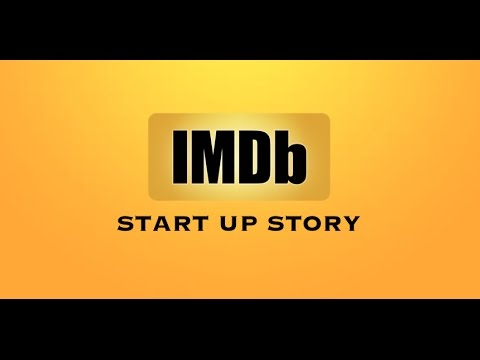

In [5]:
from IPython.display import YouTubeVideo
youtube_video = YouTubeVideo('Bttf6waezco')
display(youtube_video)

## Data dictionary
List of variables' names and definitions in the database.

|Number| Variable | Definition |
|:----:|:--------:|:----------:|
| 1| imdb_title_id| Movie ID within the database|
| 2| title| Title of the movie|
| 3| original_title| Original title of the movie, usually the name by which the movie is known in their country of origin|
| 4| year| Year of earliest release of this title globally|
| 5| date_published| Exact date of publishing|
| 6| genre| Movie genre|
| 7| duration| Movie duration|
| 8| country| Country where the film was shot|
| 9| language| Movie language|
| 10| director| Director of the movie|
| 11| writer| Writer of the movie|
| 12| production_company| Company that produced the film|
| 13| actors| Actors and actresses that are part of the film|
| 14| description| Movie description|
| 15| avg_vote| Weighted average vote. According to IMDb, not all votes have the same impact|
| 16| votes| Quantity of votes registered|
| 17| buget| Budget of the film|
| 18| usa_gross_income| Gross income in USA|
| 19| worldwide_gross_income| Worlwide gross income|
| 20| metascore| Average of critics' opinion. Needs at least 4 critics' reviews to be calculated|
| 21| reviews_from_users| Quantity of reviews that users submit|
| 22| reviews_from_critics| Quantity of critics' reviews|

## Ingestion and structural analysis
The dataset is imported in .csv format and so are the libraries pandas, numpy and matplotlib.

In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

In [4]:
movies = pd.read_csv('Datos/movies.csv')

C:\Users\Micaela Rodriguez\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


The warning is generated because there is a column that contains more than one dtype. Pandas tries to determine what dtype to set by analyzing the data in each column, but this is very memory demanding.

The option of setting the function on "low_memory=False" is not recommended for big datasets since it just silences the problem. However, in this case, the dataset isn´t that large and the columns with more than one dtype can be identified and dealt with along the analysis. Thus, the the function "low_memory=False" is used. 

In [5]:
movies = pd.read_csv('Datos/movies.csv', low_memory=False, na_values=["NaN",""])

Next, the first five observations are printed.

In [9]:
movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


Then, the function "info" is employed to obtain a summary of the structural data. This allows us to understand the type of data we have, how much memory we are spending in our ram memory and the amount of nulls.

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

From the above answer, it follows that there are a total of 85855 entries and 22 columns. Of these columns, 4 are of type float, 2 integer and 16 characters (object).

### Data cleansing
* Converting variable "year" from object to float
Since the variable "year" is an object, it must be converted to a float for further analysis.

In [6]:
movies.year.mode()

0    2017
dtype: object

In [46]:
movies["year"]=pd.to_numeric(movies["year"],errors='coerce') # pd.to_numeric converts argument to a numeric type.
#errors='coerce' then invalid parsing will be set as NaN.
print(movies.year.dtype)

float64


In [21]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85854 non-null  float64
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

Now, "year" is a float. Just to make sure that "year" is clean, we look for an attribute that previously existed in the dataset and would now be invalid (TV Movie 2019).

In [47]:
# "TV Movie 2019" is an attribute that existed on the year column. 
#The result of this should be 0 since it would be invalid parsing
movies[movies.year == "TV Movie 2019"]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,rango,budget_num,budget_curr


* Bringing variables "metascore" and "avg_vote" to base 10 (NO SÉ SI SE DICE ASÍ)

In [61]:
movies.metascore.max()

100.0

In [62]:
movies.avg_vote.max()

9.9

In order to compare these variables, they both have to be under the same base. Therefore, "metascore" will be divided by 10.

In [9]:
movies.metascore = movies.metascore/10

In [10]:
movies.metascore.max()

10.0

We've overwritten metascore with the new metascore, which is divided by 10.

* Cleaning the variable "budget"

In [89]:
movies.budget.dtype

dtype('O')

"Budget" is an object and not a float.

In [86]:
movies.budget.head(10)

0           NaN
1        $ 2250
2           NaN
3       $ 45000
4           NaN
5           NaN
6           NaN
7     ITL 45000
8    ROL 400000
9       $ 30000
Name: budget, dtype: object

The reason that "budget" is an object is that it has currencies written next to the numeric values. We want to extract the number without losing the currency so that we can later get all the budgets into only one type of currency ($).

In [26]:
# The following is a cleaning function that is applied to all columns
# "Value" is going to be a string
def clean_budget(value):
    if not value: #if value doesn´t exist, it returns nothing
        return None
    try:
        lista = value.split(" ") # divides valor that entered using a space as separator
        return int(lista[1]) # returns the second component, that is the number. With int we make sure that it returns a number
    except:
        return value 
movies["budget_num"]=movies.budget.apply(clean_budget)


In [27]:
movies.budget_num.dtype

dtype('float64')

In [28]:
def extract_curr(value):
    if not value: #if value doesn´t exist, it returns nothing
        return None
    try:
        lista = value.split(" ") #it splits the value that entered considering a space
        return lista[0] #returns the second component, which is the number. With int we make sure that it returns a number
    except:
        return value 
movies["budget_curr"]=movies.budget.apply(extract_curr)

In [29]:
movies.budget_curr.head(10)

0    NaN
1      $
2    NaN
3      $
4    NaN
5    NaN
6    NaN
7    ITL
8    ROL
9      $
Name: budget_curr, dtype: object

Now we have a column with the currency for each budget. Next, we have to find out what are the currencies within the dataset.

In [30]:
#Currencies within the dataset
movies.budget_curr.unique()

array([nan, '$', 'ITL', 'ROL', 'SEK', 'FRF', 'NOK', 'GBP', 'DEM', 'PTE',
       'FIM', 'CAD', 'INR', 'CHF', 'ESP', 'JPY', 'DKK', 'NLG', 'PLN',
       'RUR', 'AUD', 'KRW', 'BEF', 'XAU', 'HKD', 'NZD', 'CNY', 'EUR',
       'PYG', 'ISK', 'IEP', 'TRL', 'HRK', 'SIT', 'PHP', 'HUF', 'DOP',
       'JMD', 'CZK', 'SGD', 'BRL', 'BDT', 'ATS', 'BND', 'EGP', 'THB',
       'GRD', 'ZAR', 'NPR', 'IDR', 'PKR', 'MXN', 'BGL', 'EEK', 'YUM',
       'MYR', 'IRR', 'CLP', 'SKK', 'LTL', 'TWD', 'MTL', 'LVL', 'COP',
       'ARS', 'UAH', 'RON', 'ALL', 'NGN', 'ILS', 'VEB', 'VND', 'TTD',
       'JOD', 'LKR', 'GEL', 'MNT', 'AZM', 'AMD', 'AED'], dtype=object)

In [31]:
movies.budget_curr.value_counts().head(20)

$      16602
EUR     2422
INR      906
GBP      743
CAD      632
AUD      258
SEK      154
NOK      140
FRF      133
DEM      126
BRL      114
FIM      113
DKK      110
RUR       91
CNY       69
EGP       68
PLN       68
HUF       68
IRR       64
TRL       61
Name: budget_curr, dtype: int64

The US dollar is the most common currency on the dataset. The sixth currency (AUD) represents approximately 1% of US dollar's presence within the dataset. Consequently, only the first five currencies will be considered for analysis: US dollar, EUR (euro), INR (indian rupees), GBP (british pound sterling) and CAD (canadian dollar). However, in order to correctly compare the budgets, all 5 currencies will be converted to US dollars. For that, we consider the following currency equivalences:

|Number| Currency | Value equal to 1 US dollar |
|:----:|:--------:|:----------:|
| 1| EUR| 0.87|
| 2| INR| 74.54|
| 3| GBP| 0.74|
| 4| CAD| 1.25|

In [55]:
# Depending on the currency, we will convert using the table of equivalences
# If the budget currency is a EUR, then we divide the budget_num by 0.87

movies.loc[movies.budget_curr == 'EUR','budget_num']*=(1/0.87)

In [63]:
# To check if it worked we use a mask and print 5 observations
maskEUR = movies.budget_curr == "EUR"
movies[maskEUR].head(5)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,budget_num,budget_curr
19434,tt0080802,The Godsend,The Godsend,1980,1980-01-18,"Drama, Horror",93,UK,English,Gabrielle Beaumont,...,5.3,924,EUR 12000000,NaN,NaN,NaN,24.0,29.0,244474.800147,EUR
21504,tt0087622,L'ascensore,De lift,1983,1983-05-11,"Horror, Sci-Fi, Thriller",95,Netherlands,Dutch,Dick Maas,...,6.2,5940,EUR 350000,NaN,NaN,NaN,60.0,53.0,7130.515004,EUR
28081,tt0109900,Giorgino,Giorgino,1994,1994-10-05,"Adventure, Drama, Horror",177,France,English,Laurent Boutonnat,...,7.4,885,EUR 12000000,NaN,NaN,NaN,11.0,2.0,244474.800147,EUR
28671,tt0112366,Soldi proibiti,Les anges gardiens,1995,1995-10-11,"Action, Comedy, Crime",110,France,"French, English, Cantonese, Italian",Jean-Marie Poiré,...,5.9,2955,EUR 16200000,NaN,NaN,NaN,10.0,4.0,330040.980198,EUR
28679,tt0112387,L'esca,L'appât,1995,1995-03-08,"Crime, Drama",115,France,French,Bertrand Tavernier,...,6.8,1965,EUR 5350000,NaN,NaN,NaN,14.0,14.0,108995.015066,EUR


Next, we do the same conversion for the other 4 currencies.

In [57]:
# If the budget currency is a INR, then we divide the budget_num by 74.54

movies.loc[movies.budget_curr == 'INR','budget_num']*=(1/74.54)

In [58]:
# To check if it worked we use a mask and print 5 observations
maskINR = movies.budget_curr == "INR"
movies[maskINR].head(5)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,budget_num,budget_curr
6233,tt0041619,Mahal,Mahal,1949,1949,"Drama, Horror, Mystery",165,India,"Hindi, Urdu",Kamal Amrohi,...,7.1,364,INR 4500000,NaN,NaN,NaN,7.0,2.0,1094.465351,INR
7080,tt0044318,Il principe Yanez,Aan,1952,1952-07-04,"Action, Adventure, Drama",161,India,Hindi,Mehboob Khan,...,7.1,263,INR 350000,NaN,NaN,NaN,5.0,4.0,85.125083,INR
14803,tt0066763,Anand,Anand,1971,1971-03-12,"Drama, Musical",122,India,Hindi,Hrishikesh Mukherjee,...,8.5,28121,INR 3000000,NaN,NaN,NaN,117.0,11.0,729.643568,INR
16928,tt0072783,Chupke Chupke,Chupke Chupke,1975,1975-04-11,"Comedy, Drama, Romance",146,India,Hindi,Hrishikesh Mukherjee,...,8.3,11306,INR 991000,NaN,NaN,NaN,16.0,4.0,241.025592,INR
18413,tt0077451,Don,Don,1978,1978-05-12,"Action, Crime, Thriller",175,India,Hindi,Chandra Barot,...,7.8,11031,INR 50000000,NaN,NaN,NaN,21.0,12.0,12160.726126,INR


In [59]:
# If the budget currency is a GBP, then we divide the budget_num by 0.74

movies.loc[movies.budget_curr == 'GBP','budget_num']*=(1/0.74)

In [60]:
# To check if it worked we use a mask and print 5 observations
maskGBP = movies.budget_curr == "GBP"
movies[maskGBP].head(5)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,budget_num,budget_curr
499,tt0017075,Il pensionante,The Lodger: A Story of the London Fog,1927,1927-02-14,"Crime, Drama, Mystery",68,UK,None,Alfred Hitchcock,...,7.3,10024,GBP 12000,NaN,$ 83260,NaN,102.0,87.0,2.191381e+04,GBP
703,tt0019658,Atlantic,Atlantic,1929,1929-11-15,Drama,87,UK,English,Ewald André Dupont,...,5.5,187,GBP 2000,NaN,NaN,NaN,18.0,5.0,3.652301e+03,GBP
1172,tt0022268,La donna di platino,Platinum Blonde,1931,1933-11-01,"Comedy, Romance",89,USA,English,Frank Capra,...,6.9,2719,GBP 600000,NaN,NaN,NaN,60.0,27.0,1.095690e+06,GBP
1656,tt0024473,Le sei mogli di Enrico VIII,The Private Life of Henry VIII.,1933,1933-08-17,"Biography, Comedy, Drama",97,UK,"English, German",Alexander Korda,...,7.1,3598,GBP 60000,NaN,NaN,NaN,46.0,28.0,1.095690e+05,GBP
1806,tt0025118,Gli incendiari,The Fire Raisers,1934,1934-01-22,"Crime, Thriller",77,UK,English,Michael Powell,...,5.7,152,GBP 12000,NaN,NaN,NaN,5.0,4.0,2.191381e+04,GBP


In [54]:
# If the budget currency is a CAD, then we divide the budget_num by 1.25

movies.loc[movies.budget_curr == 'CAD','budget_num']*=(1/1.25)

In [61]:
# To check if it worked we use a mask and print 5 observations
maskCAD = movies.budget_curr == "CAD"
movies[maskCAD].head(5)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,budget_num,budget_curr
5724,tt0039986,Il passato è sempre presente,Whispering City,1947,1947-11-20,"Crime, Drama",98,Canada,English,Fyodor Otsep,...,6.3,276,CAD 750000,NaN,NaN,NaN,16.0,6.0,600000.0,CAD
7335,tt0045027,La petite Aurore l'enfant martyre,La petite Aurore l'enfant martyre,1952,1952-04-25,"Biography, Drama",102,Canada,French,Jean-Yves Bigras,...,3.7,282,CAD 75000,NaN,NaN,NaN,10.0,1.0,60000.0,CAD
7800,tt0046434,Tit Coq,Tit Coq,1953,1953-02-20,"Drama, Romance, War",104,"Canada, France",French,"René Delacroix, Gratien Gélinas",...,7.0,155,CAD 106000,NaN,NaN,NaN,1.0,2.0,84800.0,CAD
9237,tt0050792,Oedipus Rex,Oedipus Rex,1957,1957-01-06,Drama,87,Canada,English,"Tyrone Guthrie, Abraham Polonsky",...,6.8,264,CAD 200000,NaN,NaN,NaN,6.0,7.0,160000.0,CAD
11728,tt0057725,À tout prendre,À tout prendre,1963,1964-05-15,Drama,99,"France, Canada",French,Claude Jutra,...,7.0,311,CAD 60000,NaN,NaN,NaN,2.0,NaN,48000.0,CAD


## Semantic analysis

The semantic analysis is structured into three sections:
#### Part 1
The following exploratory questions are raised:

1. What are the most common genres within the dataset? 
2. How are the scores distributed throughout the dataset? (Both users' and critics' scores)
3. In which year are the largest number of films published?
4. What country are most of the films from?

#### Part 2
Next, the following hypotheses are proposed to be validated or rejected:
* **_Hypothesis 1_** : Users' ratings will be similar to those of the critics (average vote vs metascore).
* **_Hypothesis 2_** : The highest scoring films will be those with the largest budgets.

#### Part 3
Subsequently, the correlation between the films with the highest average vote and the rest of the variables is analysed to answer the question:
**What makes a film successful?**

### Part 1
**1. What are the most ?**

In [11]:
movies.genre.value_counts()

Drama                          12543
Comedy                          7693
Comedy, Drama                   4039
Drama, Romance                  3455
Comedy, Romance                 2508
                               ...  
Family, Fantasy, Adventure         1
Fantasy, Mystery, Action           1
Sci-Fi, Animation, Action          1
Animation, Biography, Crime        1
Music, War, Western                1
Name: genre, Length: 1257, dtype: int64

The largest number of movies within the dataset are from the drama category, followed by comedy and a combination of both genres. Now, we want to visualize this information in a circular diagram considering the top 5 genres and visualizing within the diagram the percentages corresponding to each genre.

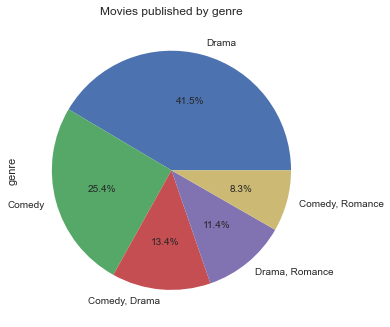

In [56]:
_=movies.genre.value_counts().head(5).plot.pie(title="Movies published by genre", autopct='%1.1f%%')

**2. How are the notes distributed throughout the dataset?**
* Users' notes

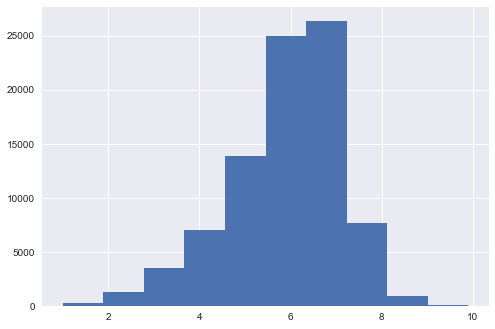

In [7]:
_=movies.avg_vote.hist()

In [14]:
movies.avg_vote.mean()

5.898655873274613

In [15]:
movies.avg_vote.mode()

0    6.4
dtype: float64

The most repeated users' score throughout the dataset is 6.4. The average score is 5.89, however from the histogram it can be seen that most of the films have scores between 6 and 8 so the mean value is punished by low scores.

In [16]:
movies.avg_vote.max()

9.9

The highest users' score of a film is 9.9.

* Critics' score

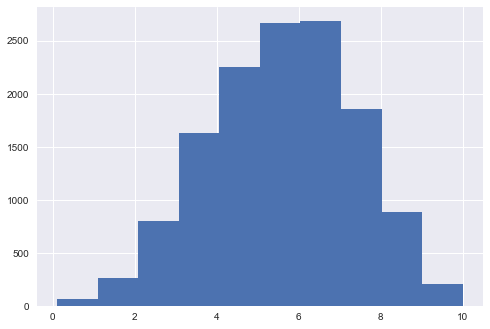

In [11]:
_=movies.metascore.hist()

In [22]:
movies.metascore.mean()

5.589688087185243

In [23]:
movies.metascore.mode()

0    6.4
dtype: float64

The median between avg_vote (users' vote) and metascore (critics' vote) are similar (approximate difference of 0.3) and the most frequent note assigned by users and by critics is 6.4.

**3. In which year are the largest number of films published?**

In [22]:
movies.year.min()

1894.0

In [49]:
movies.year.max()

2020.0

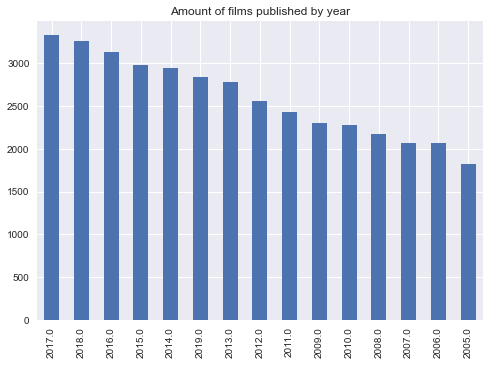

In [55]:
_=movies.year.value_counts().head(15).plot.bar(title="Amount of films published by year")

In [58]:
movies.year.value_counts()

2017.0    3329
2018.0    3257
2016.0    3138
2015.0    2977
2014.0    2942
          ... 
1913.0      13
1912.0       5
1911.0       5
1894.0       1
1906.0       1
Name: year, Length: 112, dtype: int64

2017 is the year with the biggest amount of films published (a total of 3329).

**4. What country are most of the films from?**

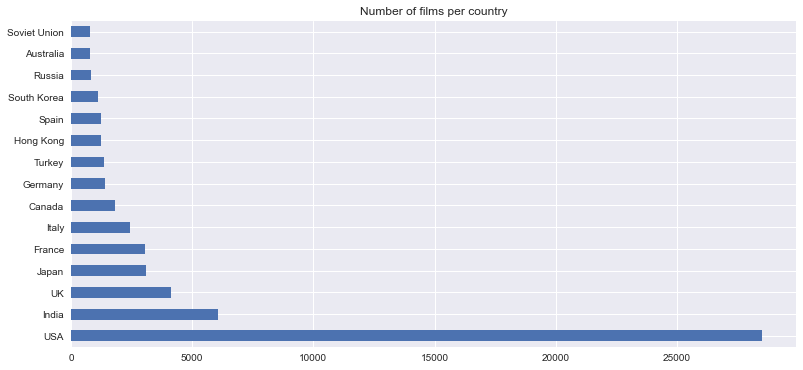

In [25]:
_=movies.country.value_counts().head(15).plot.barh(title="Number of films per country",figsize=(13,6))

In [26]:
movies.country.value_counts().head(15)

USA             28511
India            6065
UK               4111
Japan            3077
France           3055
Italy            2444
Canada           1802
Germany          1396
Turkey           1351
Hong Kong        1239
Spain            1225
South Korea      1103
Russia            802
Australia         785
Soviet Union      766
Name: country, dtype: int64

Most of the films are produced by USA, followed by India and UK.

### Part 2
**_Hipothesis 1_** : Users' ratings will be similar to those of the critics (average vote vs metascore).

First, we analyse the amount of reviews. It is expected that there will be more reviews from users than from critics.

In [27]:
movies.reviews_from_users.max()

10472.0

In [28]:
movies.reviews_from_critics.max()

999.0

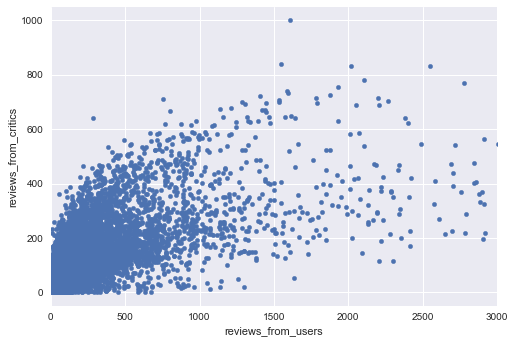

In [30]:
_=movies.plot.scatter(x="reviews_from_users",y="reviews_from_critics",xlim=(0,3000))

There are indeed, 9473 more reviews from users than from critics. However, according to the scatter plot, As more critics rate the film, more users rate the film. This deduction makes sense, since a well graded movie by critics generates attention from users and viceversa.

<AxesSubplot:>

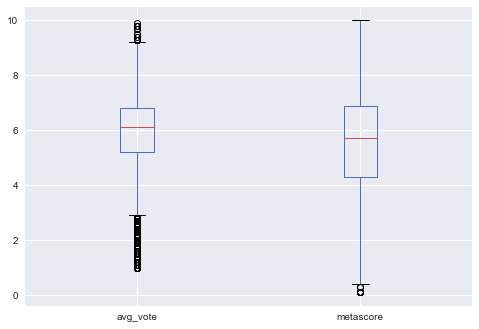

In [13]:
#To compare on a same graph the average score and metascore
meta_avg = ["avg_vote","metascore"]
movies[meta_avg].plot.box()

Few deductions from the boxplot:
* According to this graph, there is a greater variability for metascore (critics' votes). 
* There are more outliers for the users' vote, it would seem that users rarely hate a movie (rate it less than 3/10), but it's more common for a user to hate a movie than for them to extremely love it. 
* The medians are similar and the notches in the boxplots overlap, so we can conclude with 95% confidence that the medians do not differ. **This deduction contributes to the validation of hipothesis 1.**

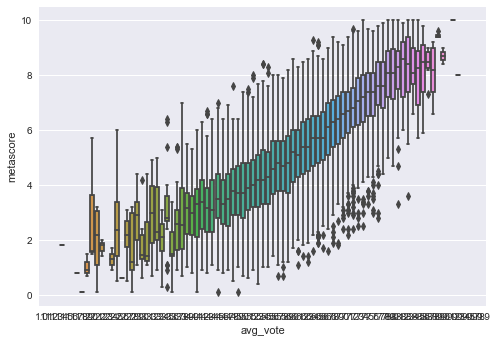

In [17]:
# Tried to make it prettier but it reads all avg votes
sns.boxplot(x='avg_vote',y='metascore',data=movies)
plt.savefig('seaborn_basic_area_diagnosis.png')

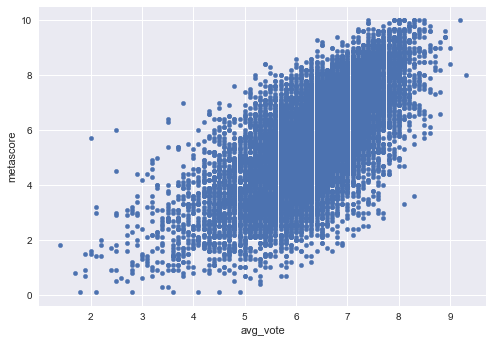

In [67]:
_=movies.plot.scatter(x="avg_vote",y="metascore")

There is a clear positive correlation between the users' score (avg_vote) and the critics' score (metascore). This result means that the users and the critics will tend to agree on the rating of the movies, the higher the users' rating, the higher we can expect the critics' rating to be. 
**The first hypothesis is therefore validated.**

**_Hipothesis 2_** : The highest scoring films will be those with the largest budgets.

In [70]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85854 non-null  float64
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

Due to the fact that hypothesis 1 was validated, in order to consider a movie as successful, it doesn't matter if we chose the "metascore" (critics' score) or the "average score" (users' score). Since there are 85855 non-null observations for "average score" where as there are only 13305 non-null observations for "metascore", it is preferred to analyze the "average vote" in order to determine the success of a film. Therefore, as of this point, the variable avg_votes is employed to determine a film's success.

In [72]:
movies.avg_vote.quantile([0.99])

0.99    8.2
Name: avg_vote, dtype: float64

The most succesfull movies will be the ones superior to the quartile 0.99. Also, for the budget we will only consider the top 5 currencies: US dollar, EUR, INR, GBP and CAD. So we proceed to implement two masks.

In [74]:
mask_success = movies.avg_vote > 8.2
maskUSD = movies.budget_curr == "$"

movies[mask_success & (maskUSD | maskEUR | maskINR | maskGBP | maskCAD)]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,budget_num,budget_curr
251,tt0012349,Il monello,The Kid,1921,1923-11-26,"Comedy, Drama, Family",68,USA,"English, None",Charles Chaplin,...,8.3,109038,$ 250000,NaN,$ 26916,NaN,173.0,105.0,2.500000e+05,$
1048,tt0021749,Luci della città,City Lights,1931,1931-04-02,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,...,8.5,162668,$ 1500000,$ 19181,$ 46008,9.9,295.0,122.0,1.500000e+06,$
2454,tt0027977,Tempi moderni,Modern Times,1936,1937-03-12,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,...,8.5,211250,$ 1500000,$ 163577,$ 457688,9.6,307.0,115.0,1.500000e+06,$
3575,tt0032553,Il grande dittatore,The Great Dictator,1940,1945-06-25,"Comedy, Drama, War",125,USA,"English, Esperanto",Charles Chaplin,...,8.4,197381,$ 2000000,NaN,$ 969879,NaN,267.0,141.0,2.000000e+06,$
3816,tt0033467,Quarto potere,Citizen Kane,1941,1948-11-25,"Drama, Mystery",119,USA,"English, Italian",Orson Welles,...,8.3,389322,$ 839727,$ 1585634,$ 1594107,10.0,1452.0,248.0,8.397270e+05,$
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85591,tt9610354,Ninnu Thalachi,Ninnu Thalachi,2019,2019-09-27,"Comedy, Romance",138,India,Telugu,Anil Thota,...,9.3,924,INR 40000000,NaN,NaN,NaN,4.0,NaN,9.728581e+03,INR
85709,tt9742362,Mallesham,Mallesham,2019,2019-06-21,Biography,131,India,Telugu,Raj Rachakonda,...,8.5,712,INR 20000000,NaN,NaN,NaN,24.0,3.0,4.864290e+03,INR
85728,tt9766160,Damayanthi,Damayanthi,2019,2019-11-29,Drama,161,India,Kannada,Navarasan,...,8.4,1076,INR 20000000,NaN,NaN,NaN,7.0,NaN,4.864290e+03,INR
85843,tt9900782,Kaithi,Kaithi,2019,2019-10-25,"Action, Thriller",145,India,Tamil,Lokesh Kanagaraj,...,8.5,8400,INR 240000000,NaN,$ 524061,NaN,188.0,8.0,5.837149e+04,INR


There are a total of 203 films that were graded higher than 8.2 and had a budget within the top 5 currencies.

Now, since all top 5 currencies have been converted to only one type of currency (US dollar), we can compare the avg_vote to the budget_num.

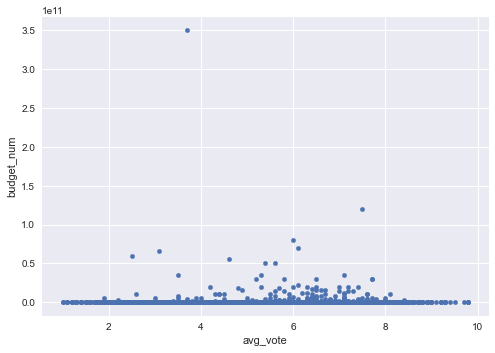

In [78]:
_=movies.plot.scatter(x="avg_vote",y="budget_num")

There is no correlation between the users' vote and the film's budget. And so, **the hypotesis 2 is rejected.**

### Parte 3
**What makes a film successful?**

In [79]:
movies.corr()

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics,budget_num
duration,1.000000,0.242432,0.125618,0.210531,0.130836,0.135465,0.012886
avg_vote,0.242432,1.000000,0.166972,0.691338,0.138185,0.200526,-0.007594
votes,0.125618,0.166972,1.000000,0.194730,0.766237,0.671635,-0.002810
metascore,0.210531,0.691338,0.194730,1.000000,0.126131,0.236107,0.010813
reviews_from_users,0.130836,0.138185,0.766237,0.126131,1.000000,0.671634,0.000349
reviews_from_critics,0.135465,0.200526,0.671635,0.236107,0.671634,1.000000,-0.005915
budget_num,0.012886,-0.007594,-0.002810,0.010813,0.000349,-0.005915,1.000000


According to the correlation table, there isn't a correlation between the avg_vote and the year, duration or budget. This means that neither the year of the film's publishing, the duration of the film nor the budget will impact on the film's success. And so, we proceed to analyze the impact of the qualitative variables considering the highest rated films previously obtained.